In [22]:
## 1. A perceptron is a neural network with a single layer of input, followed by zero or more computation layers.
## The last layer is output layer. A computation layer use a same activation function to produce output.
## At each computation layer are one or more neurons, which has their own weight vectors. Each neuron takes in the
## output vector of the previous layer right before it, calculates the linear combination with the
## its weight vector, and apply its activation function to produce the output.

In [23]:
## 2. There are multilayer perceptrons (MLP) and single layer perceptron (original perceptron).
## The original perceptron has only 1 computation layer with a linear activation function (sign function).
## The multipayer perception is the improved version of the original one with more-than-1 computation layers
## and the requirement that at least 1 non-linear activation function is used.

In [24]:
## 3. In a support vector machine model, if data is linearly separable, we can find at least a line boundarie that perfectly
## separate data classes. A hard margin is the margin that expands from this line and still separates data classes without
## a data point of a class falling into the field of another class.

In [25]:
## 4.d

In [26]:
## 5.d

In [27]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [28]:
## 6.a
import boto3
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.metrics import recall_score

## fetch file content from s3
s3 = boto3.resource('s3')
bucket = s3.Bucket('danhtran358-data-445-bucket')
bucket_object = bucket.Object('framingham.csv')
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

## read file content to data-frame
heart = pd.read_csv(file_content_stream)
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [29]:
## 6.b
## remove observations with missing values
heart = heart.dropna()

In [30]:
## 6.c.i
## defining input and target variables
X = heart[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate']]
Y = heart['TenYearCHD']

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [31]:
## 6.c.ii
## scale input variables to 0-1 range
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [32]:
def get_mlp1_recall(X_train, X_test, Y_train, Y_test):
    ## Multilayer perceptron 1
    ## Define mlp structure
    mlp_md1 = tf.keras.models.Sequential([
          tf.keras.layers.Dense(4, input_dim = 5, activation = 'tanh'),
          tf.keras.layers.Dense(2, activation = 'softmax')
    ])

    ## Compile and fit model to data
    mlp_md1.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    mlp_md1.fit(X_train, tf.keras.utils.to_categorical(Y_train), epochs = 100, batch_size = 500, verbose = 0)

    ## Predict probability 
    predict_md1 = mlp_md1.predict(X_test)[:,1]

    ## Classify labels and calculate recall
    predict_md1 = np.where(predict_md1 < 0.15, 0, 1)
    return recall_score(Y_test, predict_md1)
    
get_mlp1_recall(X_train, X_test, Y_train, Y_test)

0.6589147286821705

In [33]:
def get_mlp2_recall(X_train, X_test, Y_train, Y_test):
    ## Multilayer perceptron 2
    ## Define mlp structure
    mlp_md2 = tf.keras.models.Sequential([
          tf.keras.layers.Dense(4, input_dim = 5, activation = 'relu'),
          tf.keras.layers.Dense(2, activation = 'softmax')
    ])

    ## Compile and fit model to data
    mlp_md2.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    mlp_md2.fit(X_train, tf.keras.utils.to_categorical(Y_train), epochs = 100, batch_size = 500, verbose = 0)

    ## Predict probability 
    predict_md2 = mlp_md2.predict(X_test)[:,1]

    ## Classify labels and calculate recall
    predict_md2 = np.where(predict_md2 < 0.15, 0, 1)
    return recall_score(Y_test, predict_md2)
    
get_mlp2_recall(X_train, X_test, Y_train, Y_test)

0.4496124031007752

In [34]:
def get_svm1_recall(X_train, X_test, Y_train, Y_test):
    ## Support vector machine model 1
    ## Building the svm with kernel = 'rbf'
    svm_md3 = SVC(kernel = 'rbf', probability = True).fit(X_train, Y_train)

    ## Predict probability 
    predict_md3 = svm_md3.predict_proba(X_test)[:,1]

    ## Classify labels and calculate recall
    predict_md3 = np.where(predict_md3 < 0.15, 0, 1)
    return recall_score(Y_test, predict_md3)
    
get_svm1_recall(X_train, X_test, Y_train, Y_test)

0.13953488372093023

In [35]:
def get_svm2_recall(X_train, X_test, Y_train, Y_test):
    ## Support vector machine model 2
    ## Building the svm with kernel = 'rbf'
    svm_md4 = SVC(kernel = 'poly', probability = True).fit(X_train, Y_train)

    ## Predict probability 
    predict_md4 = svm_md4.predict_proba(X_test)[:,1]

    ## Classify labels and calculate recall
    predict_md4 = np.where(predict_md4 < 0.15, 0, 1)
    return recall_score(Y_test, predict_md4)
    
get_svm2_recall(X_train, X_test, Y_train, Y_test)

0.24806201550387597

In [36]:
## 6.d
## list to store recall of models
recall_md1 = list()
recall_md2 = list()
recall_md3 = list()
recall_md4 = list()

for i in range(100):
    # Splitting the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
    
    ## scale input variables to 0-1 range
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    
    ## call function and store recall of each model
    recall_md1.append(get_mlp1_recall(X_train, X_test, Y_train, Y_test))
    recall_md2.append(get_mlp2_recall(X_train, X_test, Y_train, Y_test))
    recall_md3.append(get_svm1_recall(X_train, X_test, Y_train, Y_test))
    recall_md4.append(get_svm2_recall(X_train, X_test, Y_train, Y_test))

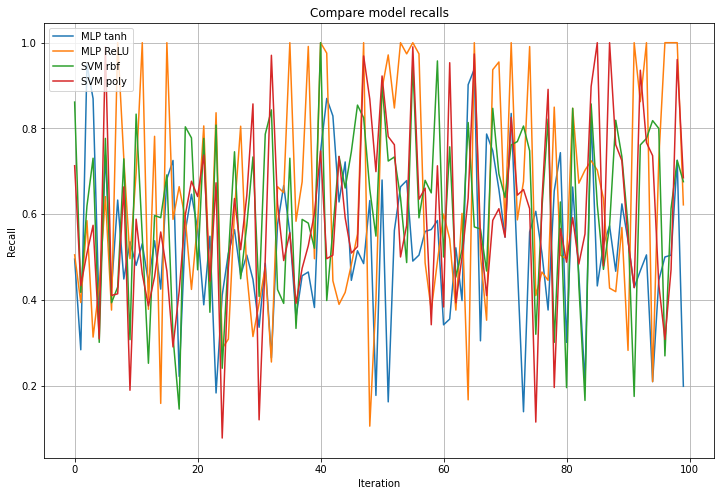

In [37]:
from matplotlib import pyplot as plt 
fig = plt.figure(figsize = (12, 8))

## Visualization of recall metrics of each model
plt.plot(recall_md1)
plt.plot(recall_md2)
plt.plot(recall_md3)
plt.plot(recall_md4)
plt.title('Compare model recalls')
plt.ylabel('Recall')
plt.xlabel('Iteration')
plt.legend(['MLP tanh', 'MLP ReLU', 'SVM rbf', 'SVM poly'], loc = 'upper left')
plt.grid()
plt.show()

In [38]:
print(np.mean(recall_md1))
print(np.mean(recall_md2))
print(np.mean(recall_md3))
print(np.mean(recall_md4))

0.5262262346914387
0.6357634062658062
0.61188087039165
0.5950800062776562


In [ ]:
## I would use model 2, multilayer perceptron containing 1 hidden layer with ReLU activation,
## because its average recall is the highest of all